In [2]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import random
from scipy import stats
import random
import pywt.data
from PIL import Image
import pandas as pd
import seaborn as sns
import seaborn as sns
import os
import pickle
from wavelet_helper import *

In [3]:
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [4]:
pywt.wavelist(kind = "discrete")

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'haar',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',
 'rbio3.3',
 'rbio3.5',
 'rbio3.7',
 'rbio3.9',
 'rbio4.4',
 'rbio5.5',
 'rbio6.8',
 'sym2',
 'sym3',
 'sym4',
 'sym5',
 'sym6',
 'sym7',
 'sym8',
 'sym9',
 'sym10',
 'sym11',
 'sym12',
 'sym13',

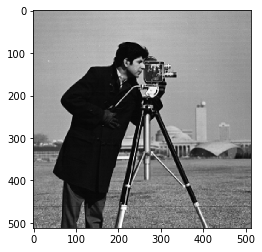

In [5]:
original = np.array(pywt.data.camera())
plt.imshow(original, interpolation="nearest", cmap=plt.cm.gray)

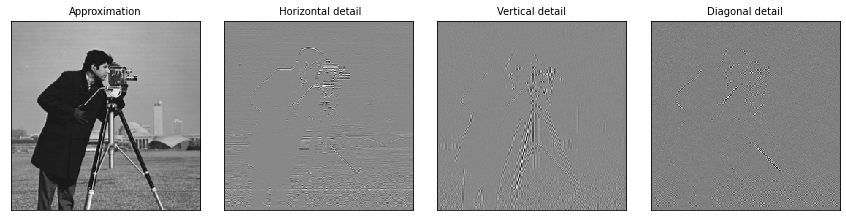

In [6]:
wavelet = "db5"

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, wavelet)
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [7]:
directory = '/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/Data/Panoptic Agriculture/Original 400 Images'
 
# iterate over files in
# that directory
file_list = [os.path.join(directory, filename) for filename in os.listdir(directory)]
file_names = os.listdir(directory)

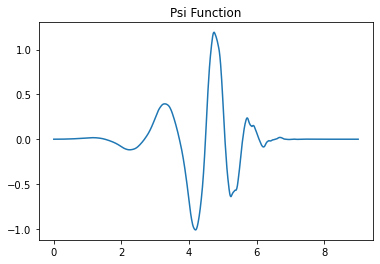

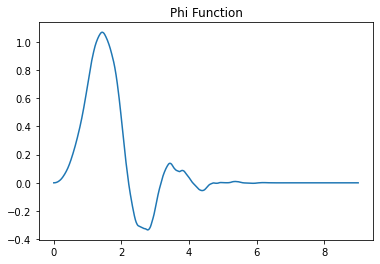

In [8]:
db2 = pywt.Wavelet('db5')
phi, psi, x = db2.wavefun(level=20)
plt.plot(x,psi)
plt.title("Psi Function")
plt.show()
plt.title("Phi Function")
plt.plot(x,phi)
plt.show()

<ipython-input-9-d74260bee194>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-9-d74260bee194>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


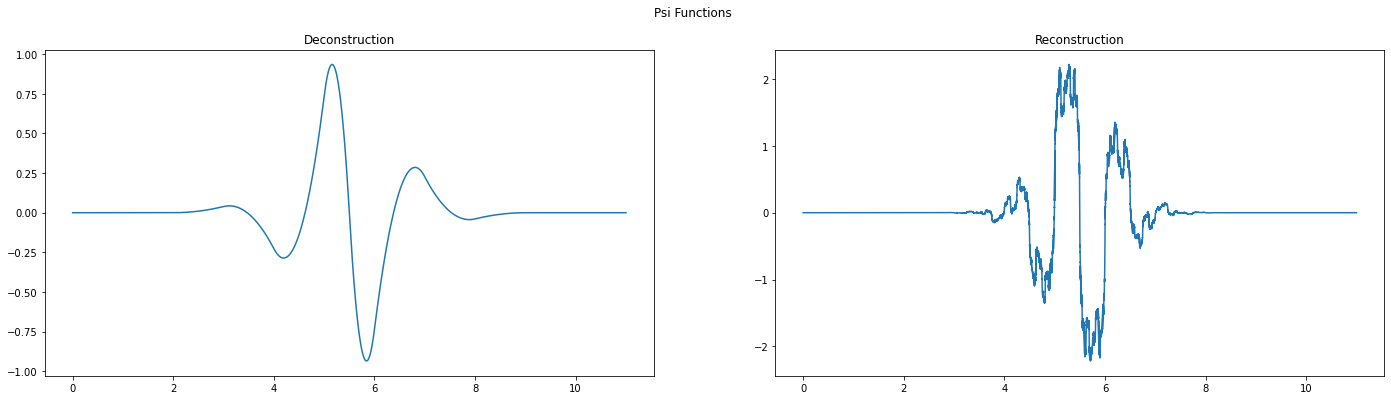

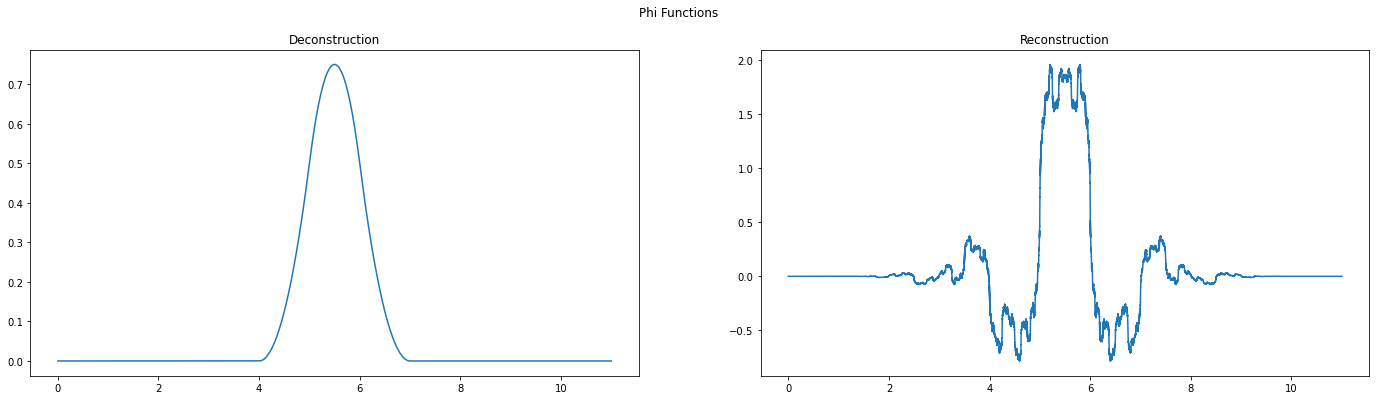

In [9]:
db4 = pywt.Wavelet('rbio3.5')
phi_d, psi_d, phi_r, psi_r, x = db4.wavefun(level=20)
fig, axes = plt.subplots(1, 2, figsize=(24, 6))
fig.suptitle("Psi Functions")
axes[0].plot(x,psi_d)
axes[1].plot(x,psi_r)
axes[0].set_title("Deconstruction")
axes[1].set_title("Reconstruction")
fig.show()
fig, axes = plt.subplots(1, 2, figsize=(24, 6))
fig.suptitle("Phi Functions")
axes[0].plot(x,phi_d)
axes[1].plot(x,phi_r)
axes[0].set_title("Deconstruction")
axes[1].set_title("Reconstruction")
fig.show()


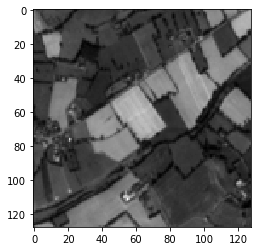

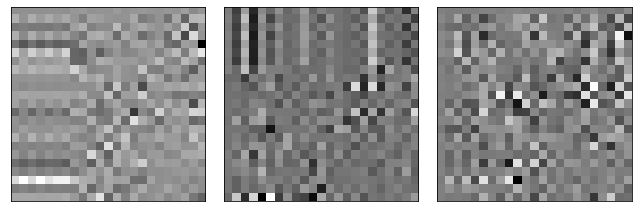

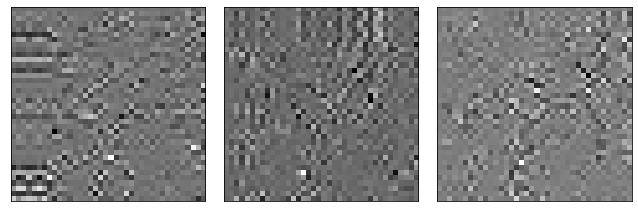

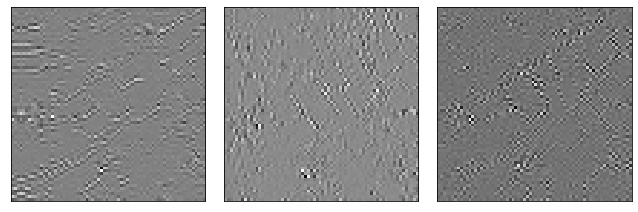

4

In [24]:
FullProcess(file_list[0], wv="db5")

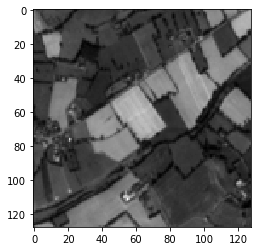

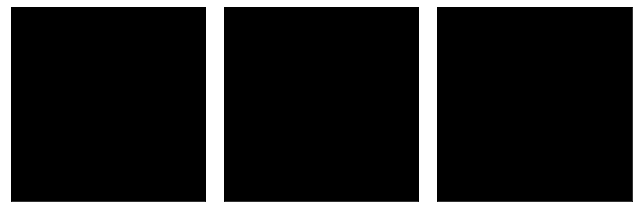

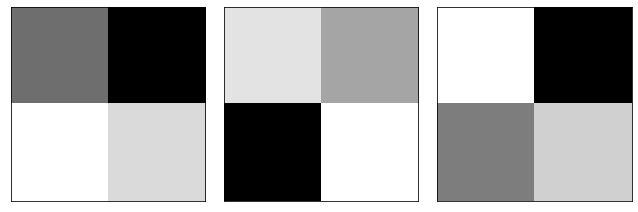

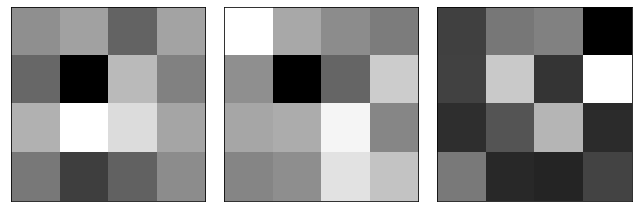

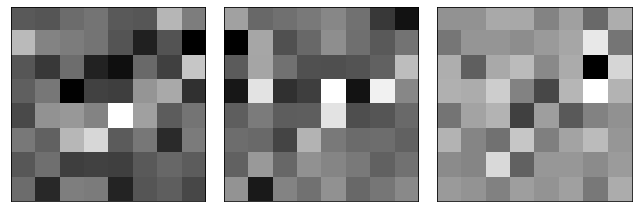

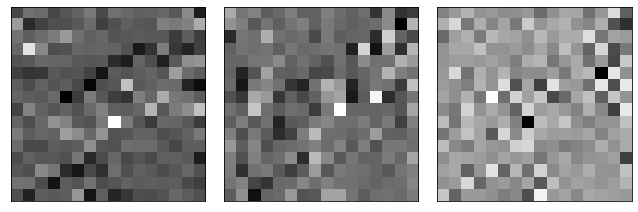

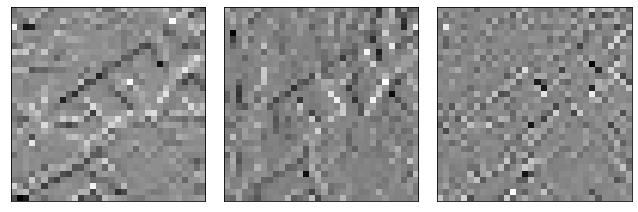

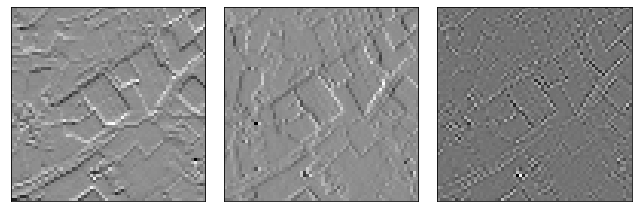

8

In [10]:
FullProcess(file_list[0], wv="db1")

8
0.535400390625


<AxesSubplot:ylabel='Count'>

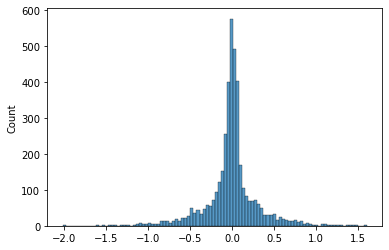

In [11]:
db1_flat = ReturnLayer(normalize_image(file_list[0]), wv= "db1")[0].flatten()
print(sum(abs(db1_flat)<=0.1)/len(db1_flat))
sns.histplot(db1_flat, bins = 100)

4
0.6102941176470589


<AxesSubplot:ylabel='Count'>

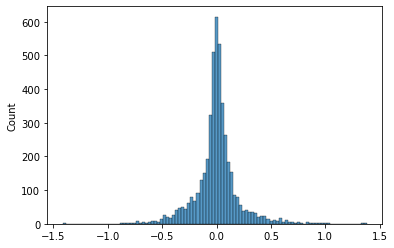

In [18]:
db5_flat = ReturnLayer(normalize_image(file_list[0]), wv= "db5")[0].flatten()
print(sum(abs(db5_flat)<=0.1)/len(db5_flat))
sns.histplot(db5_flat, bins = 100)

8


array([[ 1.31216649e-01,  7.68134046e-03, -5.96226009e-05],
       [ 7.68134046e-03,  1.63704219e-01,  6.12884024e-04],
       [-5.96226009e-05,  6.12884024e-04,  1.98418945e-02]])

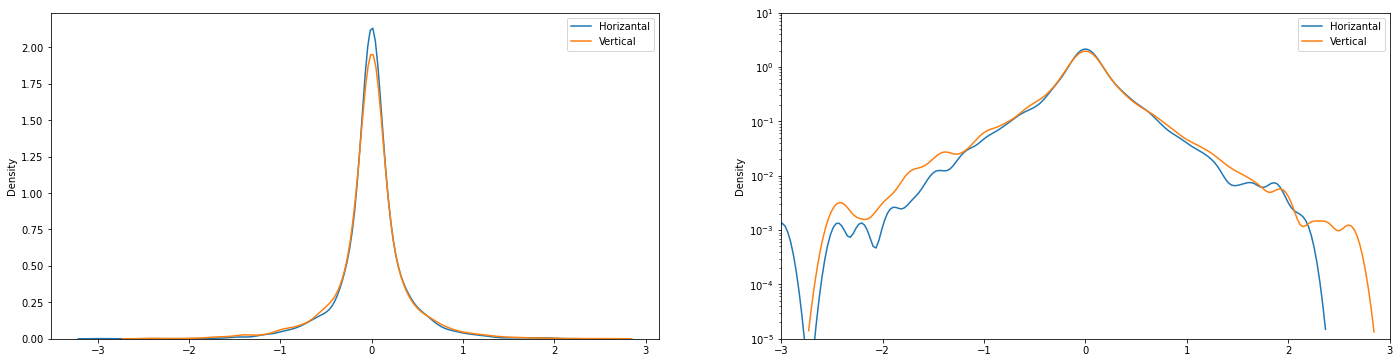

In [20]:
layer_db1 = ReturnLayer(normalize_image(file_list[2]), wv = "db1")
flat_layers_db1 = [x.flatten() for x in layer_db1]
density_of_layer(flat_layers_db1, method = 0.2, diagonal = False, without_diagonal=True)

4


array([[ 0.04833217,  0.00225583, -0.00139044],
       [ 0.00225583,  0.095405  , -0.0025164 ],
       [-0.00139044, -0.0025164 ,  0.00637293]])

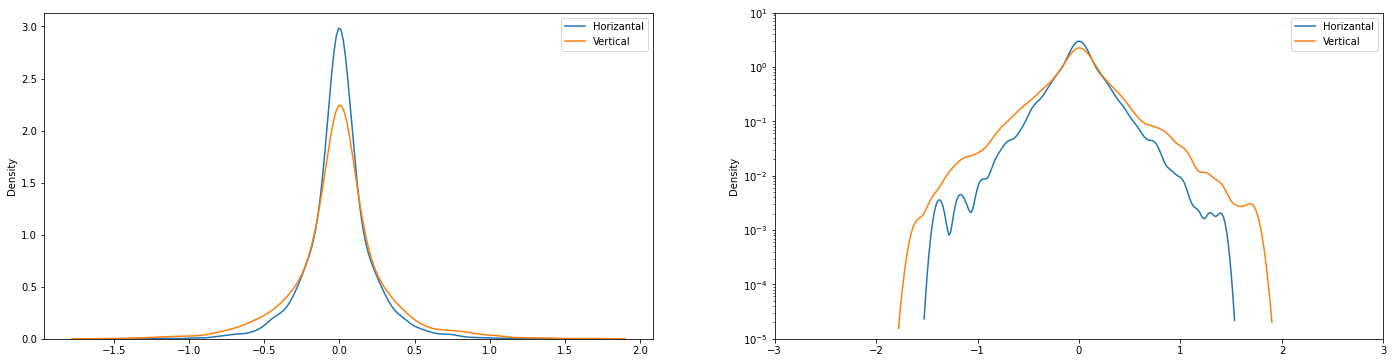

In [14]:
layer_db5 = ReturnLayer(normalize_image(file_list[2]), wv = "db5")
flat_layers_db5 = [x.flatten() for x in layer_db5]
density_of_layer(flat_layers_db5, method = 0.2, diagonal = False, without_diagonal=True)

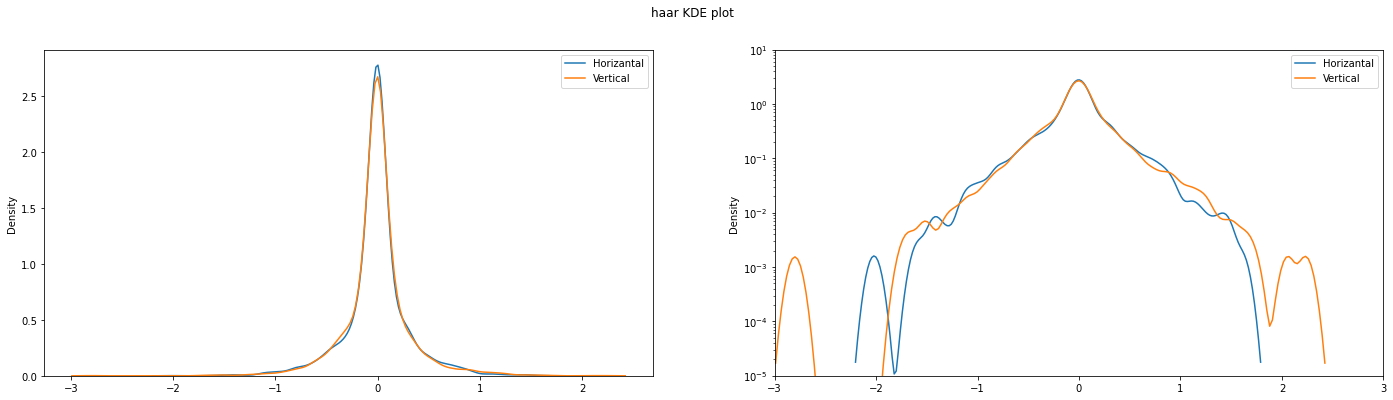

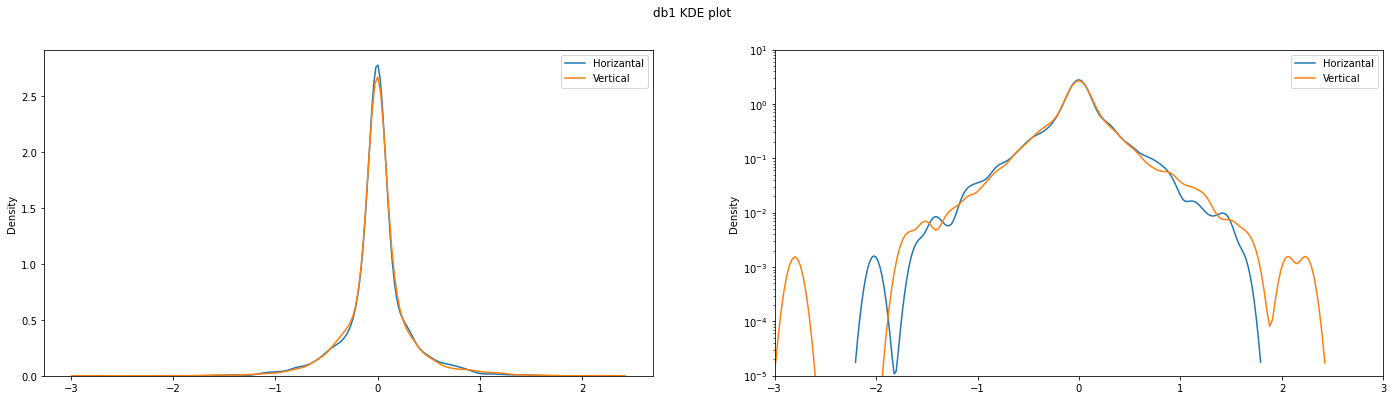

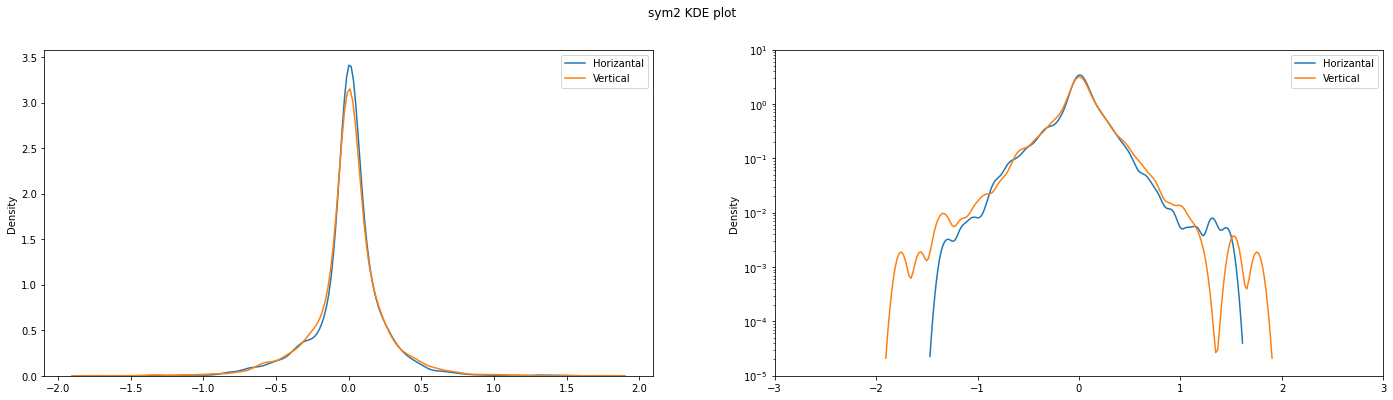

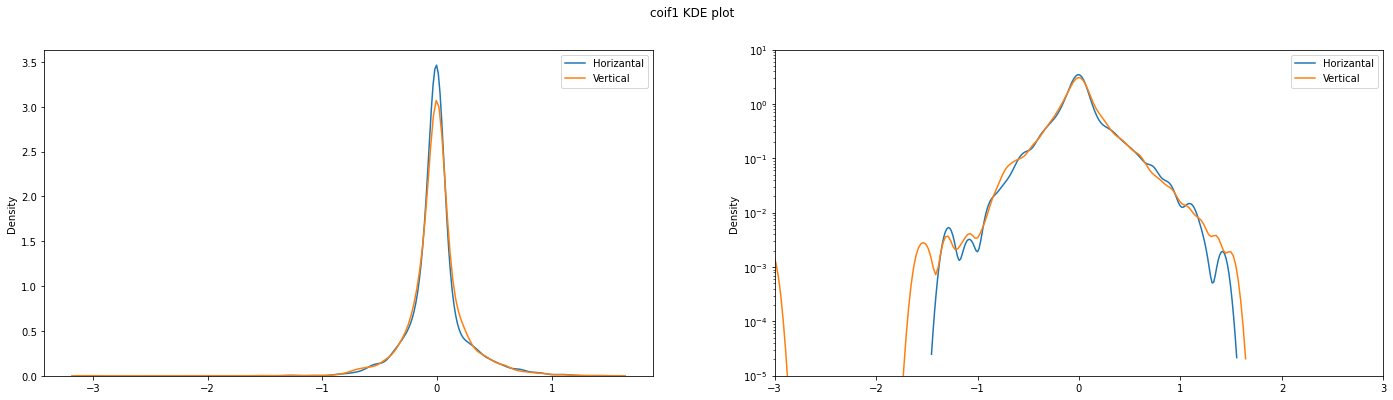

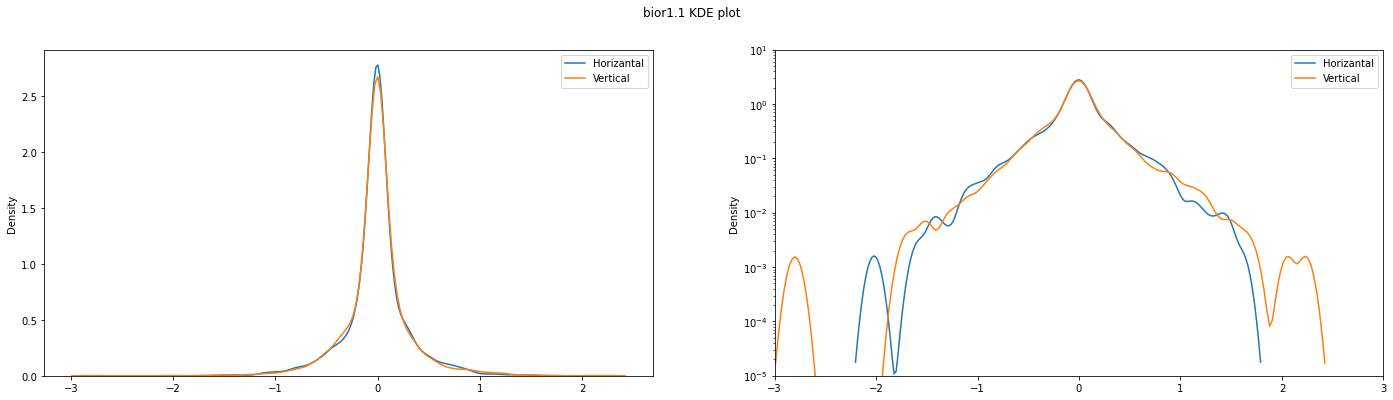

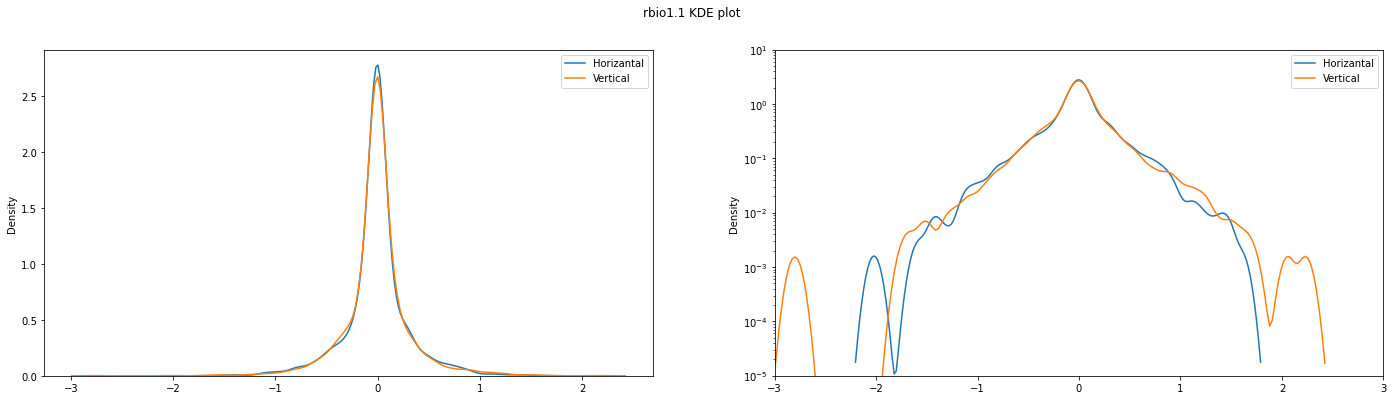

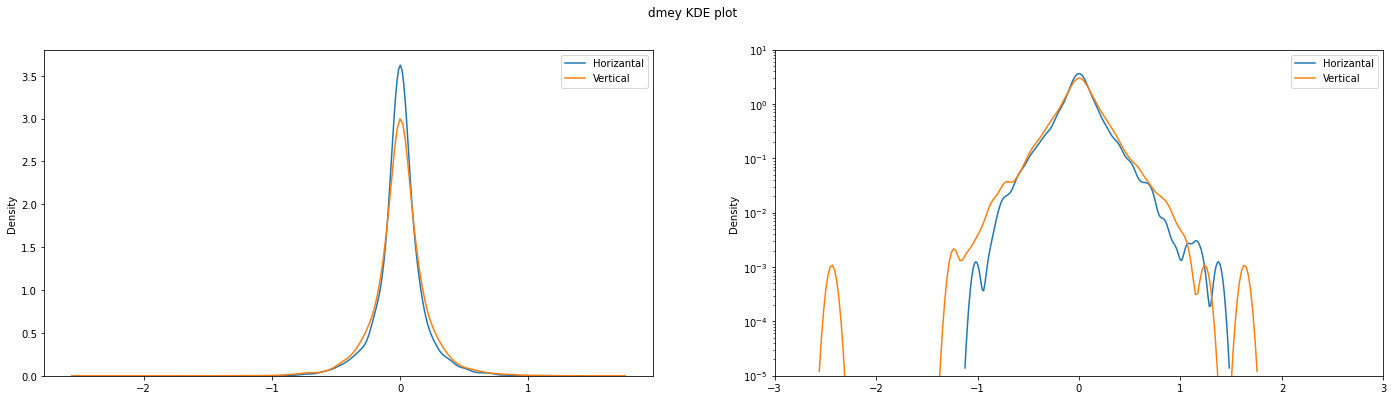

In [22]:
cont_families = pywt.wavelist(kind = "continuous")
for fam in pywt.families():
    wav = pywt.wavelist(fam)[0]
    if wav not in cont_families:
        layer_db5 = ReturnLayer(normalize_image(file_list[0]), wv = wav, print_k=False)
        flat_layers_db5 = [x.flatten() for x in layer_db5]
        density_of_layer(flat_layers_db5, method = 0.2, diagonal = False, without_diagonal=True, title = wav + " KDE plot")


In [16]:
db_wavedict = dict()
for wv in pywt.wavelist(family="db", kind='all')[:15]:
    db_wavedict[wv] = convert_to_wavelet_basis(directory, normalized = True, basis= wv)

8 layers being used
6 layers being used
5 layers being used
5 layers being used
4 layers being used
4 layers being used
4 layers being used
4 layers being used
3 layers being used
3 layers being used
3 layers being used
3 layers being used
3 layers being used
3 layers being used
3 layers being used


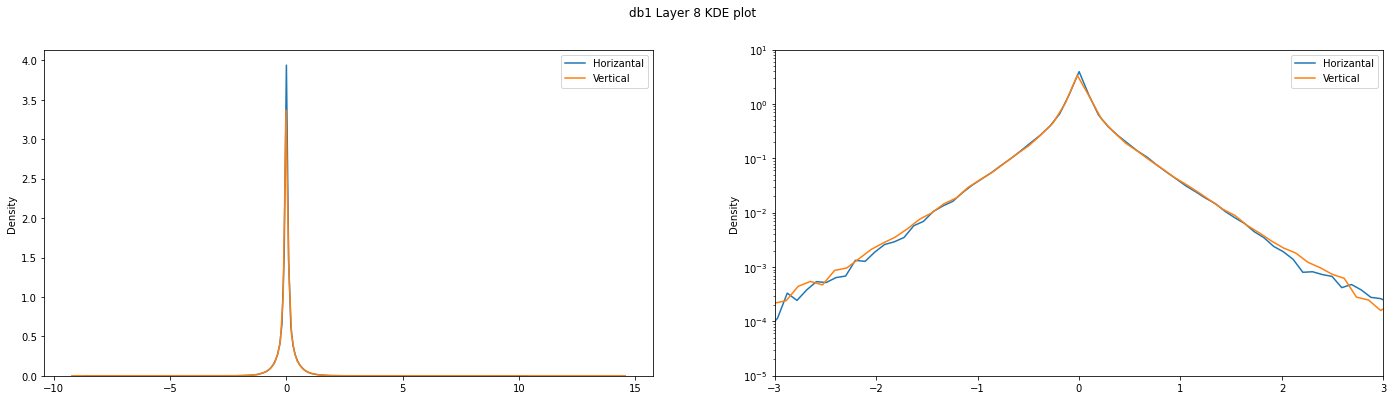

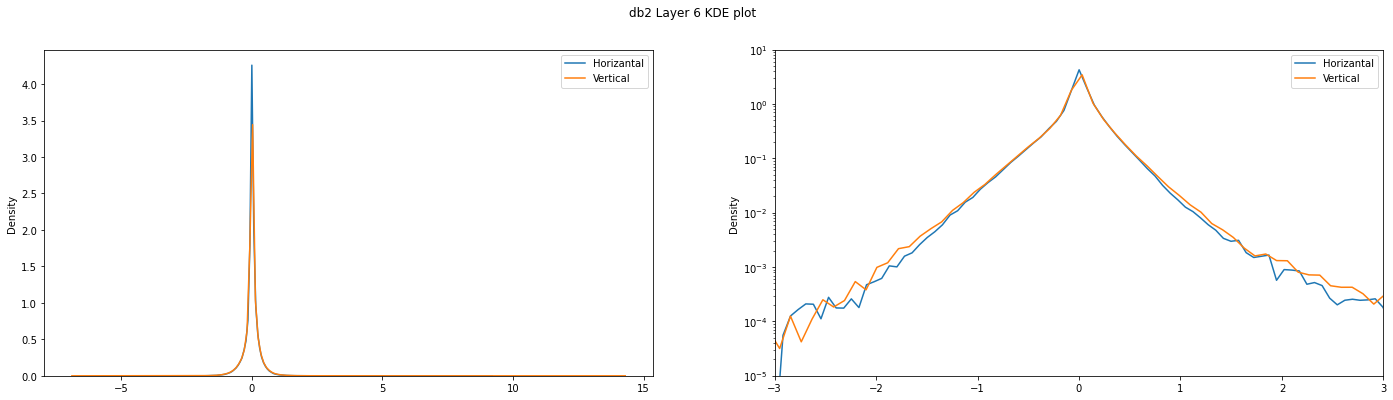

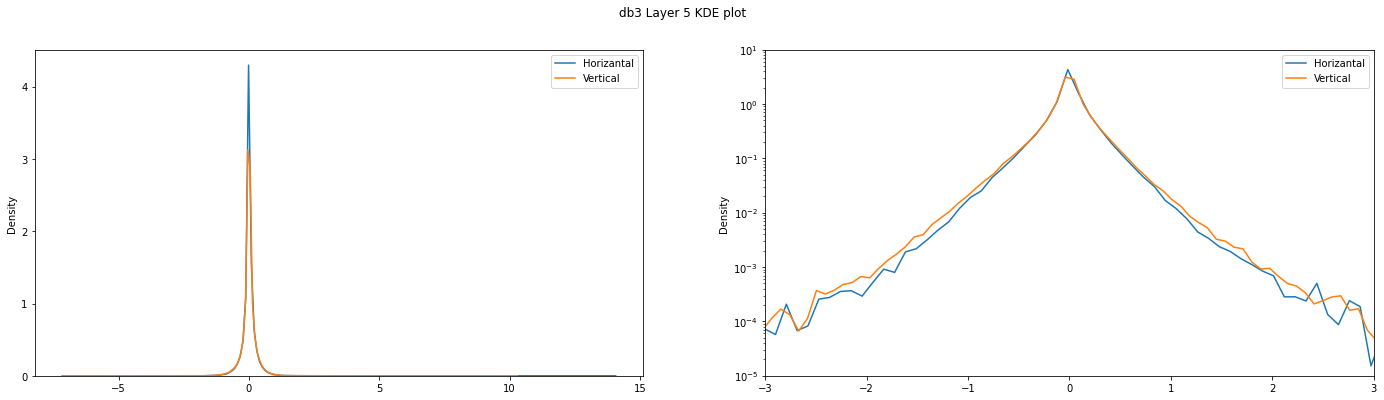

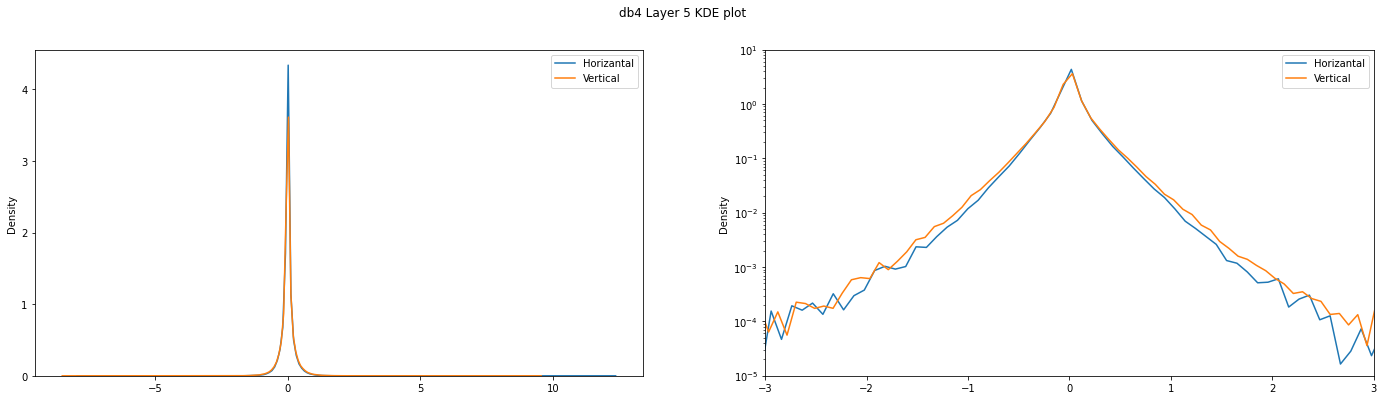

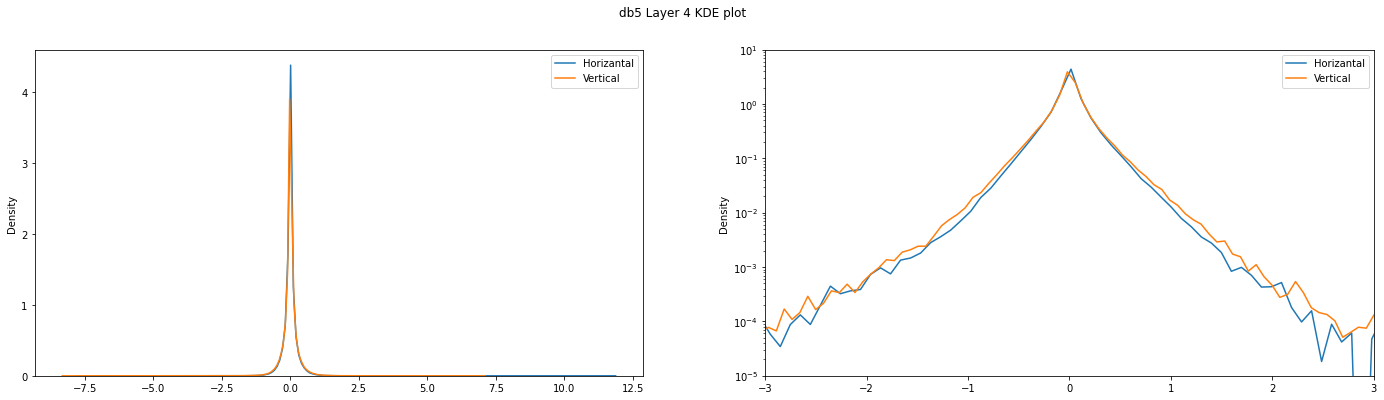

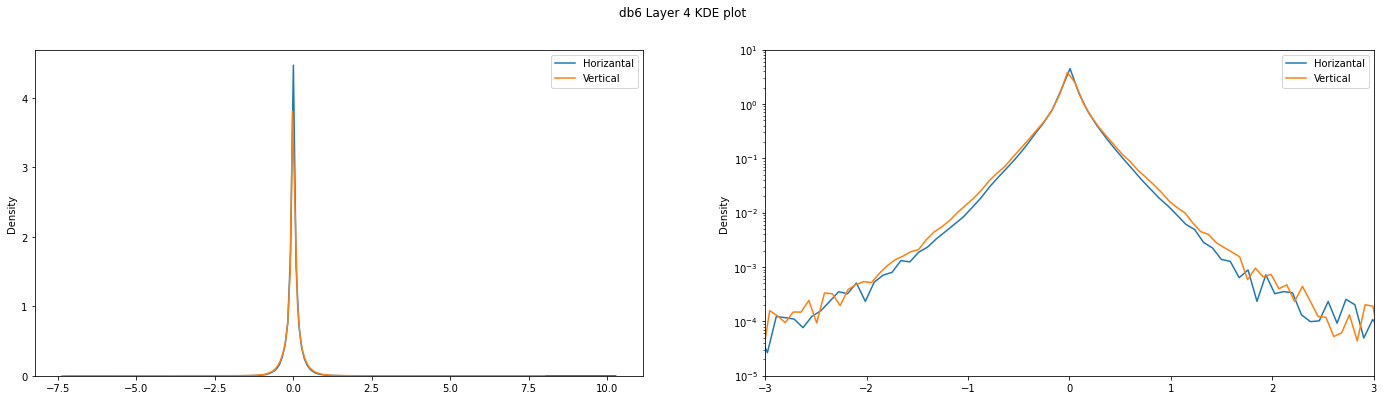

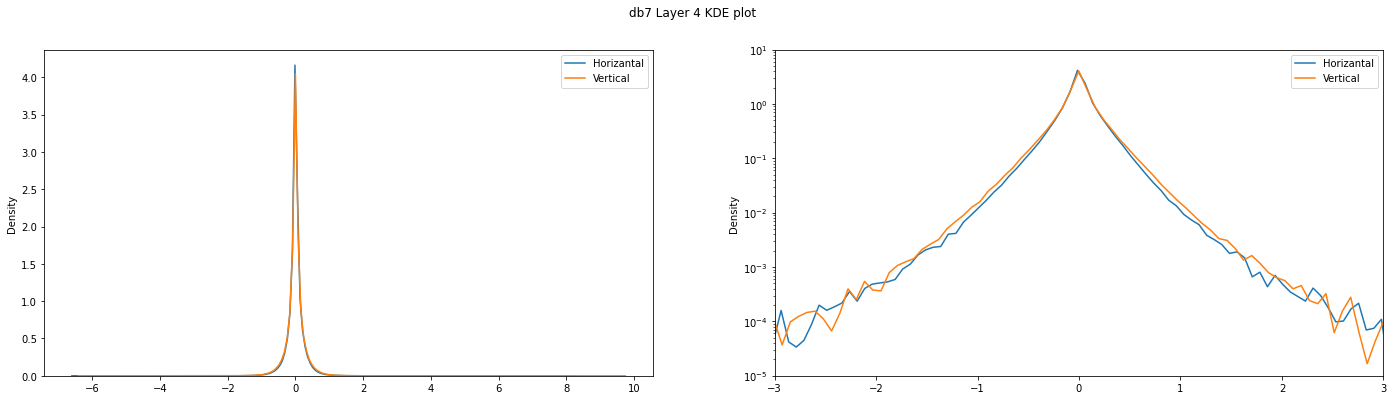

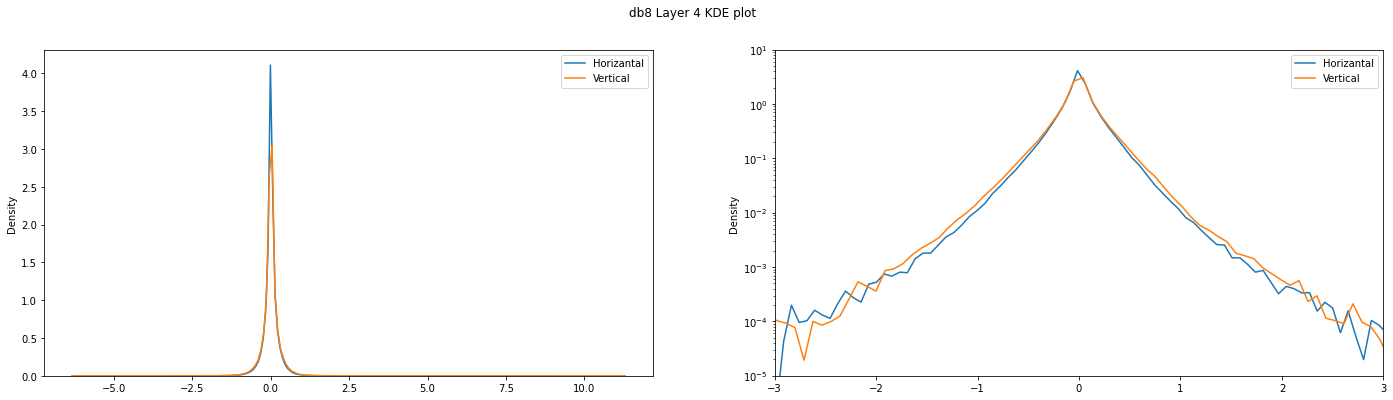

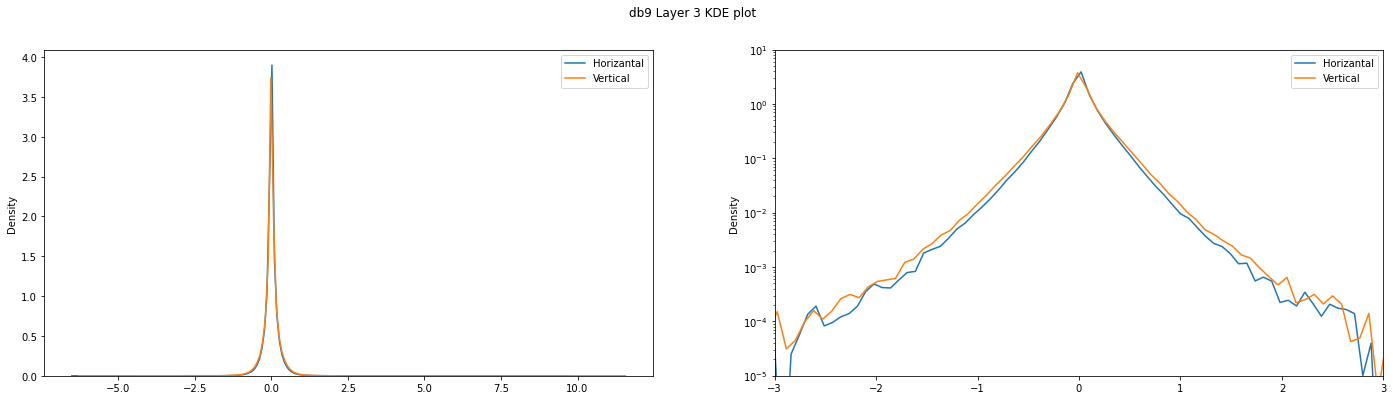

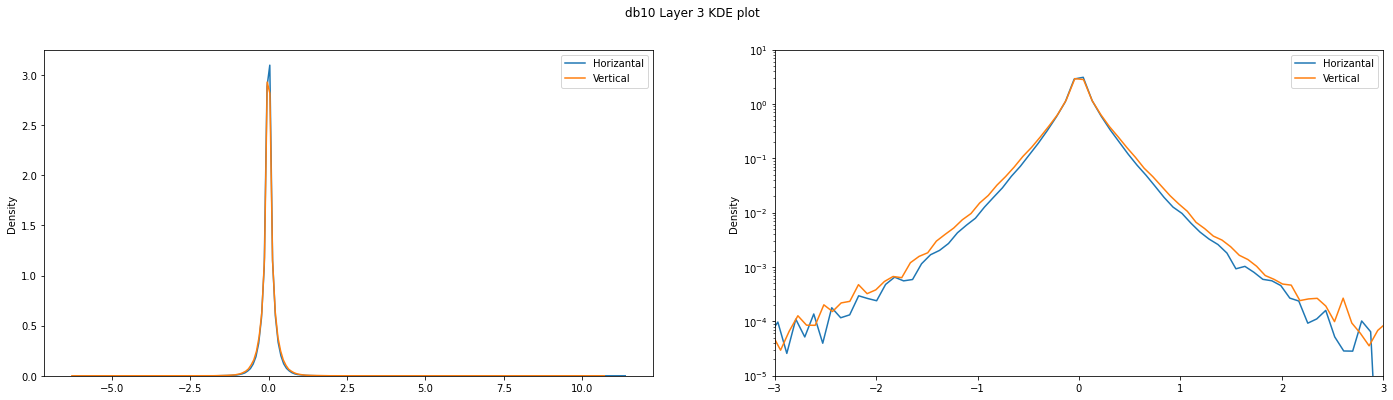

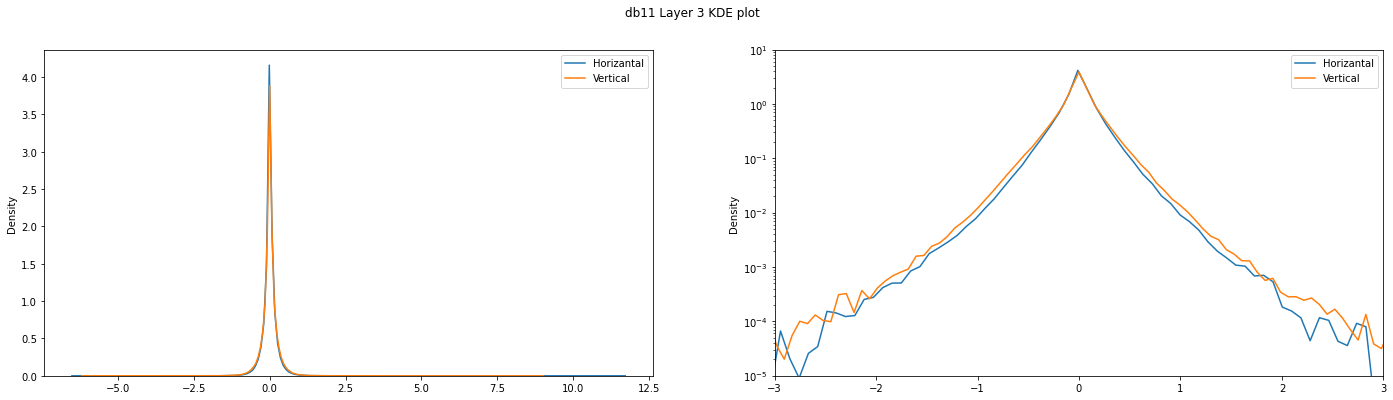

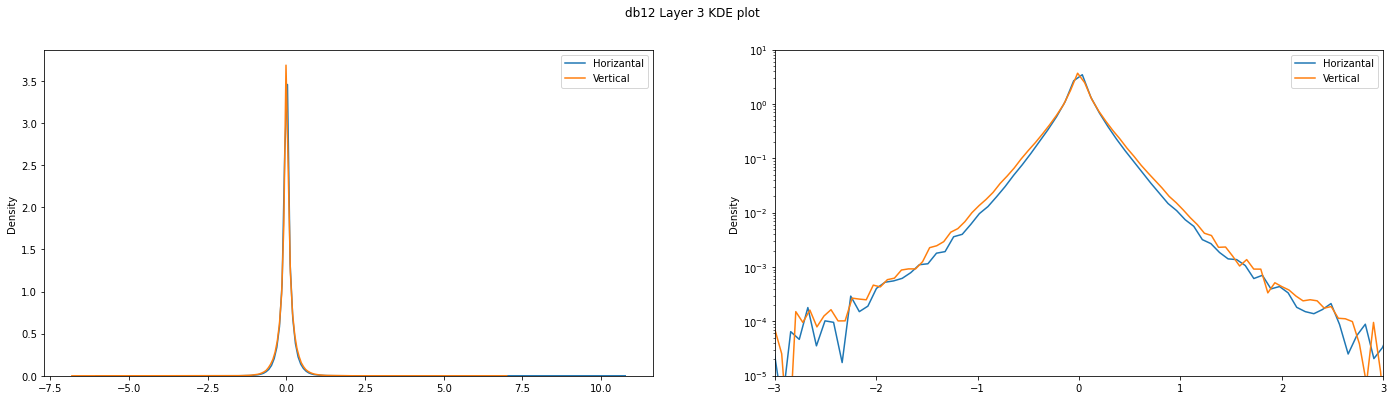

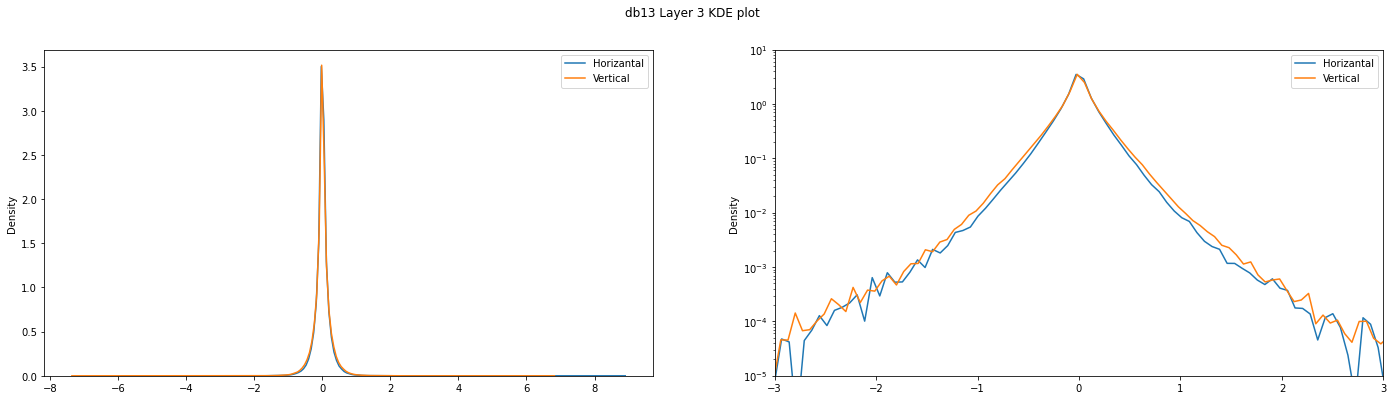

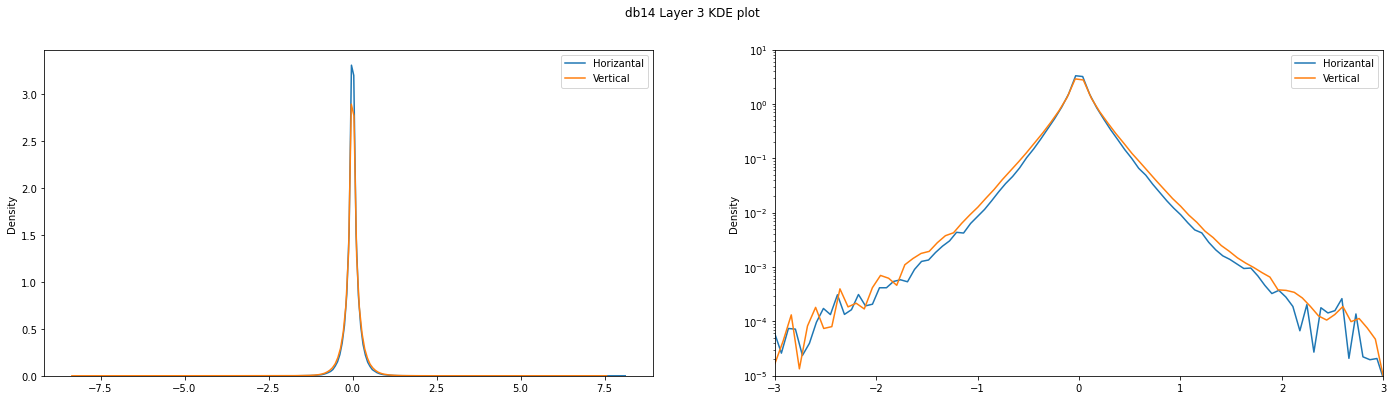

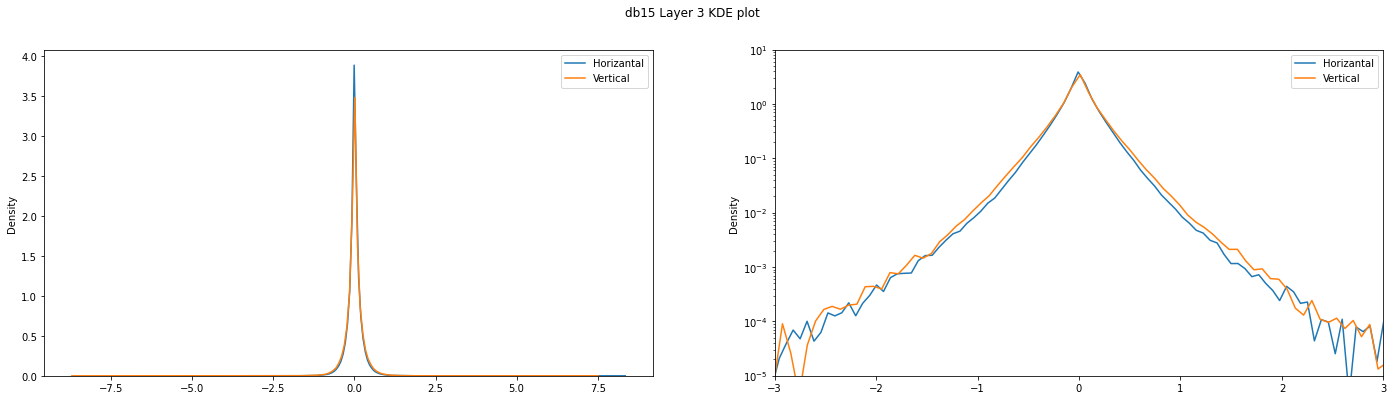

In [17]:
wav_keys = list(db_wavedict.keys())
for i in wav_keys:
    db_i_dict = db_wavedict[i]
    key = np.max(np.array(list(db_i_dict.keys())))
    layer = db_i_dict[key]
    layer["Flattened Data"] = layer["Data"].apply(lambda x: x.flatten())
    flat_layer = [np.concatenate(layer[layer["Orientation"] == direction]["Flattened Data"].values) for direction in ['Horizontal detail', 'Vertical detail', 'Diagonal detail']]
    density_of_layer(flat_layer, method = 0.02, diagonal = False, without_diagonal = True, title=i+" Layer "+str(key)+" KDE plot")
